In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
class Num_Transformer(object):

    def fit(self,X,y=None):
        df = pd.DataFrame()
        df["cost"] = X["cost"].str.strip("$").str.strip("k").astype(float)*1000
        df["weight"] = X["weight"].map(lambda x: x if type(x)==float else float(x.split(" ")[0])*1000+float(x.split(" ")[2]))
        df["height"] = X["height"].str.strip(" meters").astype(float)
        df["width"] = X["width"].str.strip(" cm").astype(float)
        df["depth"] = X["depth"].str.strip(" cm").astype(float)
        self.means = df.mean()
    
    def transform(self,X,y=None):
        df = pd.DataFrame()
        df["cost"] = X["cost"].str.strip("$").str.strip("k").astype(float)*1000
        df["weight"] = X["weight"].map(lambda x: x if type(x)==float else float(x.split(" ")[0])*1000+float(x.split(" ")[2]))
        df["height"] = X["height"].str.strip(" meters").astype(float)
        df["width"] = X["width"].str.strip(" cm").astype(float)
        df["depth"] = X["depth"].str.strip(" cm").astype(float)
        return df.fillna(self.means)
    
    def fit_transform(self,X,y=None):
        self.fit(X)
        return self.transform(X)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [5]:
steps = [('ntf', Num_Transformer()),
         ('rescale', MinMaxScaler())]
model = Pipeline(steps)

In [6]:
df = model.fit_transform(df)

In [7]:
df

array([[0.35031847, 0.30872483, 0.58888889, 0.30434783, 0.33333333],
       [0.176468  , 0.26845638, 0.53888889, 0.32608696, 0.33333333],
       [0.28343949, 0.27516779, 0.72222222, 0.2173913 , 0.16666667],
       ...,
       [0.176468  , 0.30201342, 0.63333333, 0.2826087 , 0.25      ],
       [0.04352442, 0.2147651 , 0.45555556, 0.36956522, 0.33333333],
       [0.13269639, 0.23489933, 0.7       , 0.19565217, 0.16666667]])

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA()
df_pca = pca.fit_transform(df)

In [10]:
df_pca

array([[-7.86602072e-02,  1.39935677e-01,  1.13296208e-01,
         3.22659079e-02, -1.48342036e-02],
       [-4.80201708e-02, -1.65752927e-02,  1.78382526e-02,
         1.68878556e-02, -8.92445009e-03],
       [-3.07464531e-01,  9.27770758e-02,  8.01450224e-02,
        -1.36135847e-02,  1.57694662e-02],
       ...,
       [-1.72866442e-01,  2.42559640e-02, -1.07531260e-02,
        -9.01542992e-03,  2.83998946e-03],
       [ 1.57882326e-02, -1.63537173e-01, -3.33083718e-02,
        -1.45528346e-02,  1.92686639e-03],
       [-3.16625349e-01, -4.33696007e-02,  5.94055427e-06,
        -5.35248337e-03,  1.58879904e-03]])

In [11]:
pca.explained_variance_ratio_

array([0.58234386, 0.26898479, 0.14202916, 0.00539552, 0.00124666])

Text(0, 0.5, 'Explained Variance')

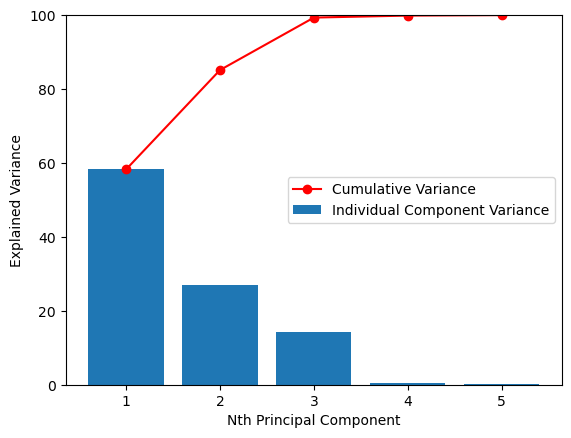

In [12]:
plt.bar(range(1,pca.n_components_+1), height = 100*pca.explained_variance_ratio_, label="Individual Component Variance")
plt.plot(range(1,pca.n_components_+1), np.cumsum(100*pca.explained_variance_ratio_), 'o-', color='red', label="Cumulative Variance")
plt.legend()
plt.ylim(0,100)
plt.xlabel("Nth Principal Component")
plt.ylabel("Explained Variance")

The following process demonstares how the transformation matrix (the basic vectors of the principle components) transforms the original features to the principal components.

In [13]:
np.dot(df-np.mean(df, axis=0), pca.components_.T)

array([[-7.86602072e-02,  1.39935677e-01,  1.13296208e-01,
         3.22659079e-02, -1.48342036e-02],
       [-4.80201708e-02, -1.65752927e-02,  1.78382526e-02,
         1.68878556e-02, -8.92445009e-03],
       [-3.07464531e-01,  9.27770758e-02,  8.01450224e-02,
        -1.36135847e-02,  1.57694662e-02],
       ...,
       [-1.72866442e-01,  2.42559640e-02, -1.07531260e-02,
        -9.01542992e-03,  2.83998946e-03],
       [ 1.57882326e-02, -1.63537173e-01, -3.33083718e-02,
        -1.45528346e-02,  1.92686639e-03],
       [-3.16625349e-01, -4.33696007e-02,  5.94055427e-06,
        -5.35248337e-03,  1.58879904e-03]])